In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt,exp

<Figure size 2304x1728 with 0 Axes>

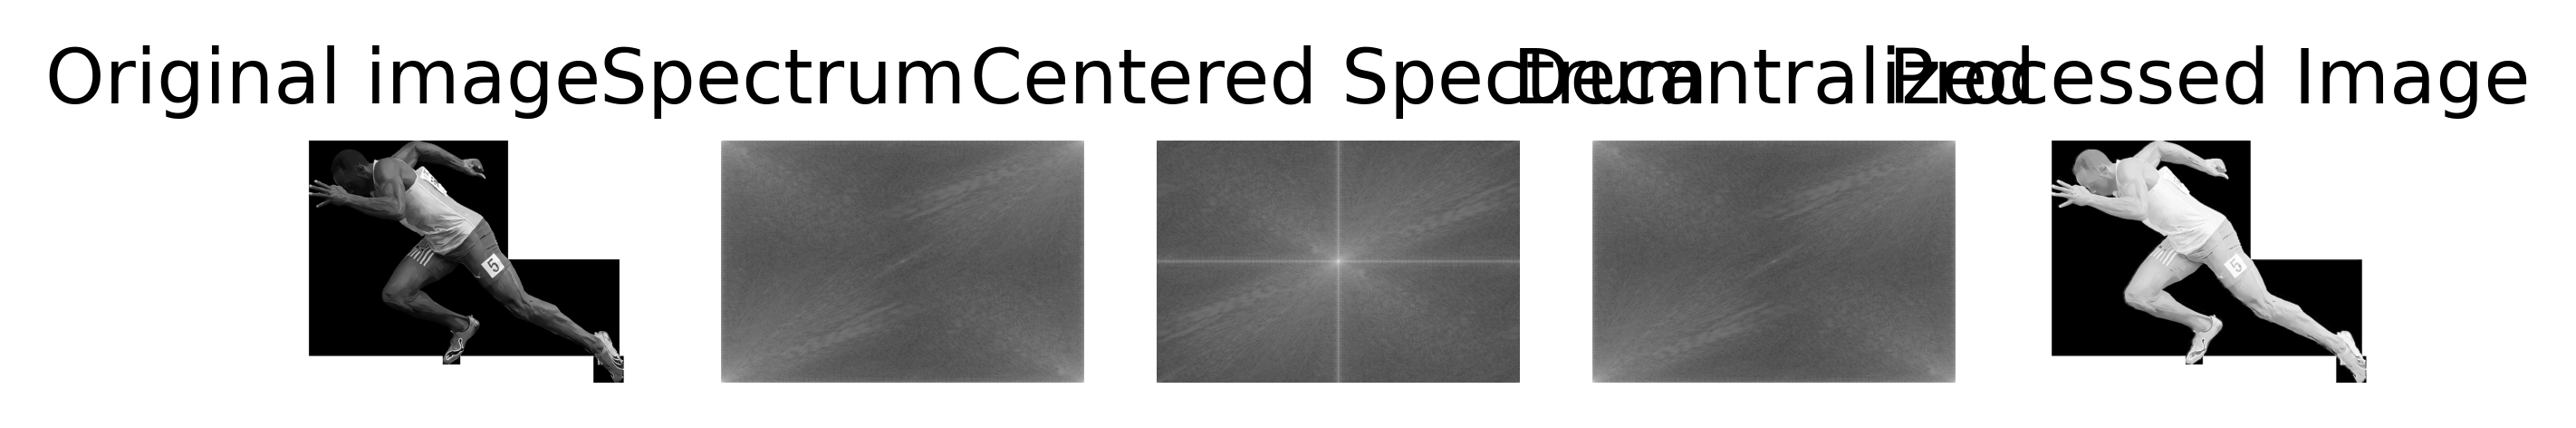

In [ ]:
plt.figure(figsize=(6.4*5,4.8*5), constrained_layout=False)
fig=plt.figure(dpi=500)

img=cv2.imread('R.png',0)
plt.axis('off')

plt.subplot(151),plt.imshow(img,'gray'),plt.title('Original image            ')
plt.axis('off')

original=np.fft.fft2(img)
plt.subplot(152),plt.imshow(np.log(1+np.abs(original)),'gray'),plt.title('Spectrum          ')
plt.axis('off')

center=np.fft.fftshift(original)
plt.subplot(153),plt.imshow(np.log(1+np.abs(center)),'gray'),plt.title('Centered Spectrum')
plt.axis('off')

inv_center=np.fft.ifftshift(center)
plt.subplot(154),plt.imshow(np.log(1+np.abs(inv_center)),'gray'),plt.title('Decantralized')
plt.axis('off')

processed_img=np.fft.ifft2(inv_center)
plt.subplot(155),plt.imshow(np.log(1+np.abs(processed_img)),'gray'),plt.title('Processed Image')
plt.axis('off')

plt.show()

In [ ]:
def distance(point1,point2):
  return np.sqrt((point1[0]-point2[0])**2+(point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
  base = np.zeros(imgShape[:2])
  rows,cols = imgShape[:2]
  center = (rows/2,cols/2)
  for x in range(cols):
    for y in range(rows):
      if distance((y,x),center)<D0:
        base[y,x]=1
  return base

def idealFilterHP(D0,imgShape):
  base = np.zeros(imgShape[:2])
  rows,cols = imgShape[:2]
  center = (rows/2,cols/2)
  for x in range(cols):
    for y in range(rows):
      if distance((y,x),center)<D0:
        base[y,x]=0
  return base

def butterworthLP(D0,imgShape,n):
  base = np.zeros(imgShape[:2])
  rows,cols = imgShape[:2]
  center = (rows/2,cols/2)
  for x in range(cols):
    for y in range(rows):
        base[y,x]=1/(1+(distance((y,x),center)<D0)**(2*n))
  return base


def butterworthHP(D0,imgShape,n):
  base = np.zeros(imgShape[:2])
  rows,cols = imgShape[:2]
  center = (rows/2,cols/2)
  for x in range(cols):
    for y in range(rows):
        base[y,x]=1-1/(1+(distance((y,x),center)<D0)**(2*n))
  return base

def gaussianLP(D0,imgShape):
  base = np.zeros(imgShape[:2])
  rows,cols = imgShape[:2]
  center = (rows/2,cols/2)
  for x in range(cols):
    for y in range(rows):
        base[y,x]=np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
  return base

def gaussianHP(D0,imgShape):
  base = np.zeros(imgShape[:2])
  rows,cols = imgShape[:2]
  center = (rows/2,cols/2)
  for x in range(cols):
    for y in range(rows):
        base[y,x]=1-np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
  return base

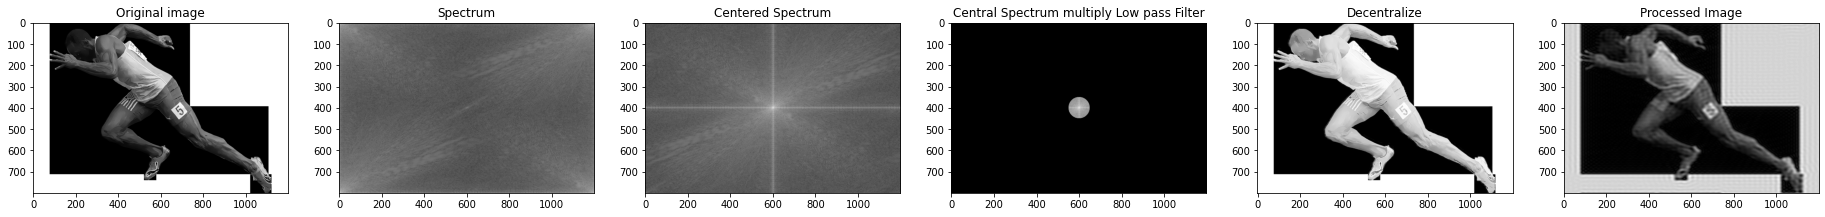

In [ ]:
plt.figure(figsize=(6.4*5,4.8*5), constrained_layout=False)

img=cv2.imread('R.png',0)
plt.subplot(161),plt.imshow(img,'gray'),plt.title('Original image')

original=np.fft.fft2(img)
plt.subplot(162),plt.imshow(np.log(1+np.abs(original)),'gray'),plt.title('Spectrum')

center=np.fft.fftshift(original)
plt.subplot(163),plt.imshow(np.log(1+np.abs(center)),'gray'),plt.title('Centered Spectrum')

LowPassCenter = center * idealFilterLP(50,img.shape)
plt.subplot(164),plt.imshow(np.log(1+np.abs(LowPassCenter)),'gray'),plt.title('Central Spectrum multiply Low pass Filter')

LowPass=np.fft.fftshift(LowPassCenter)
plt.subplot(165),plt.imshow(np.log(1+np.abs(processed_img)),'gray'),plt.title('Decentralize')

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(166),plt.imshow(np.abs(inverse_LowPass),'gray'),plt.title('Processed Image')

plt.show()

(<matplotlib.axes._subplots.AxesSubplot at 0x7f1665d3c850>,
 Text(0.5, 1.0, 'gaussian low pass'))

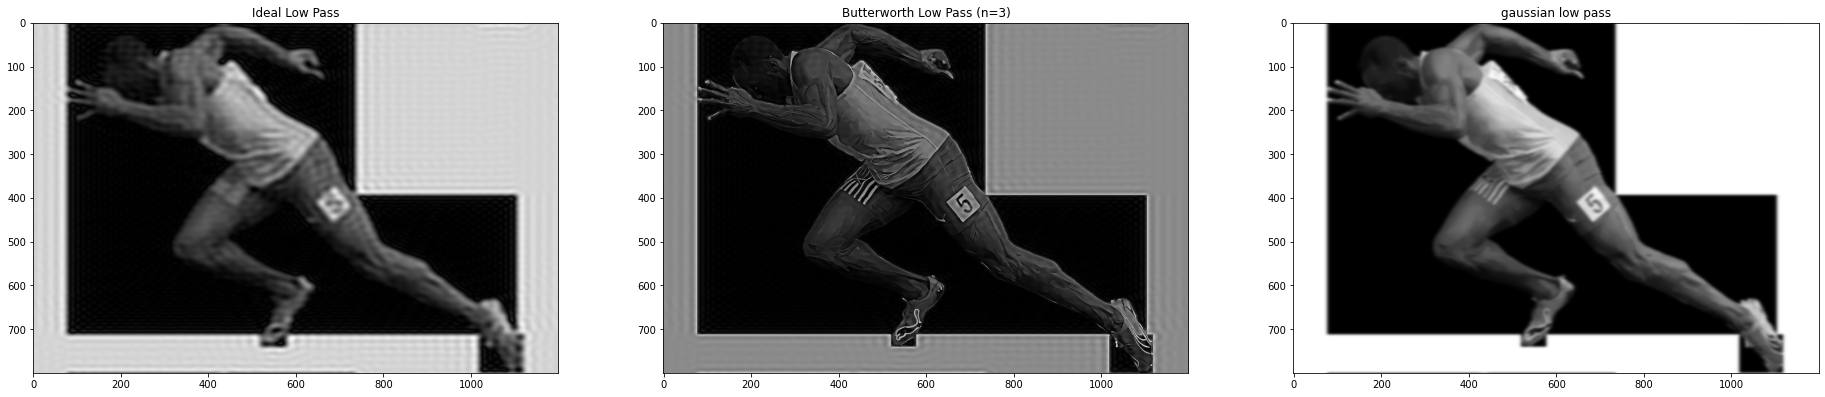

In [ ]:
img = cv2.imread("R.png",0)
original = np.fft.fft2(img)
ceter = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5,4.8*5), constrained_layout=False)

LowPassCenter = center * idealFilterLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(131),plt.imshow(np.abs(inverse_LowPass),"gray"),plt.title("Ideal Low Pass")

LowPassCenter = center * butterworthLP(50,img.shape,3)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132),plt.imshow(np.abs(inverse_LowPass),"gray"),plt.title("Butterworth Low Pass (n=3)")

LowPassCenter = center * gaussianLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(133),plt.imshow(np.abs(inverse_LowPass),"gray"),plt.title("gaussian low pass")